# Tukey Method for Outlier Detection

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 8, 7
sb.set_style('whitegrid')

In [3]:
address = 'C:/Users/Beedoo/Desktop/Data/iris.data.csv'
iris = pd.read_csv(address)
iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa


In [4]:
iris_subset = iris.iloc[:, iris.columns.get_indexer(['Sepal Length', 'Sepal Width', 'Petal Length', "Petal Width"])]
iris_species = iris.iloc[:, iris.columns.get_loc('Species')]

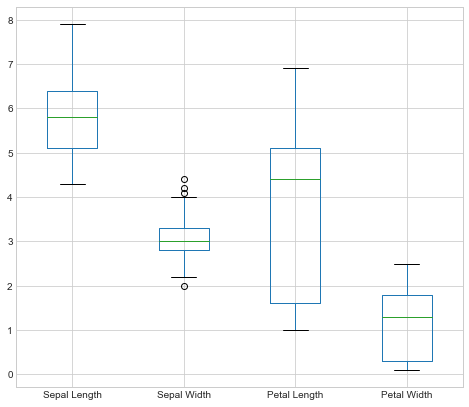

In [5]:
iris.boxplot(return_type='dict')
plt.show()

In [7]:
Sepal_Width = iris.iloc[:,iris.columns.get_loc('Sepal Width')]
iris_outliers = (Sepal_Width > 4)
iris[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
14,5.7,4.4,1.5,0.4,setosa
31,5.2,4.1,1.5,0.1,setosa
32,5.5,4.2,1.4,0.2,setosa


In [9]:
Sepal_Width = iris.iloc[:,iris.columns.get_loc('Sepal Width')]
iris_outliers = (Sepal_Width < 2.05)
iris[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
59,5.0,2.0,3.5,1.0,versicolor


In [10]:
pd.options.display.float_format = '{:.1f}'.format
iris_df = pd.DataFrame(iris_subset)
print(iris_df.describe())

       Sepal Length  Sepal Width  Petal Length  Petal Width
count         149.0        149.0         149.0        149.0
mean            5.8          3.1           3.8          1.2
std             0.8          0.4           1.8          0.8
min             4.3          2.0           1.0          0.1
25%             5.1          2.8           1.6          0.3
50%             5.8          3.0           4.4          1.3
75%             6.4          3.3           5.1          1.8
max             7.9          4.4           6.9          2.5


In [16]:
Q1_sepalWidth = 2.8
Q3_sepalWidth = 3.3
IQR = Q3_sepalWidth - Q1_sepalWidth
a = Q1_sepalWidth-1.5*IQR
print('a = ', a)
b = Q3_sepalWidth+1.5*IQR
print('b = ', b)
maxValue_sepalWidth = 4.4
minValue_sepalWidth = 2.0
if minValue_sepalWidth < a and maxValue_sepalWidth > b:
    print('The Sepal Width variable seems to have extreme values')
print(Sepal_Width[Sepal_Width < a])
print(Sepal_Width[Sepal_Width > b])

a =  2.05
b =  4.05
The Sepal Width variable seems to have extreme values
59   2.0
Name: Sepal Width, dtype: float64
14   4.4
31   4.1
32   4.2
Name: Sepal Width, dtype: float64
